## Исследование данных о российском кинопрокате



<b>Цель исследования:</b> Изучить рынок российского кинопроката и выявить текущие тренды. Уделите внимание фильмам, которые получили государственную поддержку. Попробовать ответить на вопрос, насколько такие фильмы интересны зрителю.

<b>Ход исследования:</b> Данные берем из двух файлов: mkrf_movies.csv и mkrf_shows.csv. Так как про данные ничего не известно потребуется провести обзор и предобработку данных. Проверить данные на ошибки и пустые значения. А затем постараться исправить ошибки в данных, чтобы получить максимально достоверный результат.

<b>Этапы исследования:</b>

- Обзор данных;
- Предобработка данных;
- Расчеты и добавление новых столбцов;
- Исследовательский анализ;
- Общий вывод.

### Шаг 1. Откройте файлы с данными и объедините их в один датафрейм.

Объедините данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм.


In [1]:
import matplotlib.pyplot as plt
import pylab as pl
import pandas as pd

In [2]:
# Загружаем файлы
try:
    mkrf_shows = pd.read_csv('/content/mkrf_shows.csv', sep=',', skipinitialspace = True)
    mkrf_movies = pd.read_csv('/content/mkrf_movies.csv', sep=',', skipinitialspace = True)
except:
    print('Что-то не так с файлом. Проверь файл с данными.')

mkrf_movies.info()
mkrf_shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

Пержде чем объединить таблицы поменяем тип данных в столбце puNumber в mkrf_movies. Так как в этой таблице данные в столбце находятся в формате строки, а вот в mkrf_shows в числовом формате. Поэтому в первой таблице поменяем тип данных в столбце. При этом так как в столбце есть буквенное значение, сначала заменим его методом replace().

In [3]:
mkrf_movies['puNumber'] = mkrf_movies['puNumber'].replace('нет','0')
mkrf_movies['puNumber'] = mkrf_movies['puNumber'].astype('int')

In [4]:
mkrf_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   int64  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

С помощью метода info() проверяем что тип данных был изменен не числовой. Значит можно приступать к объединению таблиц. Для этого будем использовать метод merge()

In [5]:
combined_data = mkrf_movies.merge(mkrf_shows, on = 'puNumber', how ='left')
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   int64  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

После объединения так же проверяем что таблицы объединены и у нас в конце есть новый столбец box_office. А так же количество строк в этом столбце совпадает с тем что было во сторой таблице.

### Шаг 2. Предобработка данных

#### Шаг 2.1. Проверьте типы данных

- Проверьте типы данных в датафрейме и преобразуйте их там, где это необходимо.

Еще раз пройдемся по типам данных, для этого посмотрим на информацию полученную методом info(). А так же выведем несколько срок методом head().
Нам точно потребуется дата(show_start_date), поэтому ее нужно преобразовать в соответствующий формат и рейтинг фильма(ratings)

In [6]:
combined_data.head(5)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


In [7]:
na = combined_data.isna().sum()
na_perc = round(combined_data.isna().mean()*100,2)
display(pd.DataFrame({'Количество пропусков':na,'% пропусков':na_perc}).style.format('{:.2f}').background_gradient('coolwarm'))

,Количество пропусков,% пропусков
title,0.00,0.00
puNumber,0.00,0.00
show_start_date,0.00,0.00
type,0.00,0.00
film_studio,18.00,0.24
production_country,2.00,0.03
director,9.00,0.12
producer,568.00,7.59
age_restriction,0.00,0.00
refundable_support,7154.00,95.57


In [8]:
combined_data['show_start_date'] = pd.to_datetime(combined_data['show_start_date'], format = '%Y-%m-%dT%H:%M:%S')

combined_data['ratings'] = combined_data['ratings'].fillna('0')

combined_data.loc[combined_data['ratings'] == '99%']

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
259,Прошлое,221030715,2015-07-29 12:00:00+00:00,Художественный,"20 Сенчюри Фокс де Архентина, Чемо, ЭйчБи Филм...",Аргентина - Бразилия,Эктор Бабенко,"Эктор Бабенко, Оскар Крамер, Хуго Сидмэн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,99%,"ужасы,триллер,драма",NaN
1341,Сказка о добре и Вре,111008913,2013-11-15 12:00:00+00:00,Художественный,"НП ""Студия игрового кино ""Лик""",Россия,Е.Шиляева,К.Терещенко,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,99%,"триллер,драма,детектив",NaN
1805,Спираль.,111001014,2014-01-30 12:00:00+00:00,Художественный,"ООО ""Компания Питон""",Россия,А.Волгин,Е.Ковалева,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,99%,"аниме,мультфильм,ужасы",4295.0
6882,Животные рядом со Святыми,112003719,2019-05-03 12:00:00+00:00,Документальный,"ООО ""Кинопрограмма ""XXI век""",Россия,Т.Мирошник,"В.Есинов, Е.Калинина",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,99%,"криминал,драма",NaN


Дату преобразуем из строки в дататайм с помощью метода to_datetime(). А вот с о столбцом рейтинг будет сложнее, так как в столбце есть пропуски в  виде значений nan, а так же значения введенные в виде процентов. Поэтому выше вывел для наглядности количество и % пропусков во всех столбцах. Но так как в рейтинге пропусков почти 13% просто удалить строки будет не верно. Поэтому пропуски на данно этапе зменяю на 0. А затем с помощью двух циклов убираю % значения. В первом убираю занк %, а во втором все значения что больше 10 делю на 10 соответственно, чтобы получить оценку сопоставимую с остальными.

In [9]:
for t in combined_data['ratings']:
    if '%' in t:
        combined_data.loc[combined_data['ratings'] == t, 'ratings'] = t.replace('%','')
combined_data['ratings'] = combined_data['ratings'].astype('float')
for t in combined_data['ratings']:
    if t > 10:
        combined_data.loc[combined_data['ratings'] == t, 'ratings'] = t/10

In [ ]:
combined_data.loc[6882]

title                                 Животные рядом со Святыми
puNumber                                              112003719
show_start_date                       2019-05-03 12:00:00+00:00
type                                             Документальный
film_studio                        ООО "Кинопрограмма "XXI век"
production_country                                       Россия
director                                             Т.Мирошник
producer                                   В.Есинов, Е.Калинина
age_restriction          «0+» - для любой зрительской аудитории
refundable_support                                          NaN
nonrefundable_support                                       NaN
budget                                                      NaN
financing_source                                            NaN
ratings                                                     9.9
genres                                           криминал,драма
box_office                              

Для проверки вывожу 259 строку. Видим что все рпобразования прошли верно. Можно двигаться дальше.

#### Шаг 2.2. Изучите пропуски в датафрейме

- Объясните, почему заполнили пропуски определённым образом или почему не стали этого делать.

Еще раз выведем сумму и % пропусков в таблице.

In [10]:
na = combined_data.isna().sum().sort_values()
na_perc = round(combined_data.isna().mean()*100,2).sort_values()
display(pd.DataFrame({'Количество пропусков':na,'% пропусков':na_perc}).style.format('{:.2f}').background_gradient('coolwarm'))

,Количество пропусков,% пропусков
title,0.00,0.00
puNumber,0.00,0.00
show_start_date,0.00,0.00
type,0.00,0.00
age_restriction,0.00,0.00
ratings,0.00,0.00
production_country,2.00,0.03
director,9.00,0.12
film_studio,18.00,0.24
producer,568.00,7.59


В столбцах film_studio, production_country и director пропусков менее 5% поэтому такие строки просто удаляем.

In [11]:
combined_data.dropna(subset = ['film_studio', 'production_country', 'director'], inplace = True)

In [12]:
na = combined_data.isna().sum()
na_perc = round(combined_data.isna().mean()*100,2)
display(pd.DataFrame({'Количество пропусков':na,'% пропусков':na_perc}).style.format('{:.2f}').background_gradient('coolwarm'))

,Количество пропусков,% пропусков
title,0.00,0.00
puNumber,0.00,0.00
show_start_date,0.00,0.00
type,0.00,0.00
film_studio,0.00,0.00
production_country,0.00,0.00
director,0.00,0.00
producer,564.00,7.56
age_restriction,0.00,0.00
refundable_support,7127.00,95.55


После удаления строк с пустыми значениями в столбцах film_studio, production_country и director у нас есть пропуски еще в нескольких. В столбцах producer и genres пропуски составлют от 8 до 12% и кажется логично заменить эти значения на "Неизвестно"

In [13]:
columns_to_replace = ['producer', 'genres']
for column in columns_to_replace:
    combined_data[column] = combined_data[column].fillna('неизвестно')
combined_data['producer']

0               Дэвид Валдес, Кевин Костнер, Джейк Эбертс
1                                              неизвестно
2       Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит
3       Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит
4       Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит
                              ...                        
7481                                          Фил Грабски
7482    Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэ...
7483                                       Дженнифер Додж
7484                                            Д.Ловейко
7485                                            Д.Ловейко
Name: producer, Length: 7459, dtype: object

In [14]:
na = combined_data.isna().sum()
na_perc = round(combined_data.isna().mean()*100,2)
display(pd.DataFrame({'Количество пропусков':na,'% пропусков':na_perc}).style.format('{:.2f}').background_gradient('coolwarm'))

,Количество пропусков,% пропусков
title,0.00,0.00
puNumber,0.00,0.00
show_start_date,0.00,0.00
type,0.00,0.00
film_studio,0.00,0.00
production_country,0.00,0.00
director,0.00,0.00
producer,0.00,0.00
age_restriction,0.00,0.00
refundable_support,7127.00,95.55


В итоге у нас остались пропуски только столбцах бюджет фильма, объем возвратных и невозвратных средств, источник финансирования и сборы. Но для рсчетов эти пропуски не будут мешать.


#### Шаг 2.3. Изучите дубликаты в датафрейме
- Проверьте, есть ли в данных дубликаты. Опишите причины, которые могли повлиять на появление дублей.

In [15]:
combined_data.duplicated().sum()

0

Видим что явных дубликатов у нас нет. Проверим наличие неявных дубликатов.

In [16]:
combined_data['puNumber'].duplicated().sum()

2

In [17]:
combined_data.groupby('puNumber')['title'].count().sort_values(ascending = False)

puNumber
221154310    2
221054410    2
0            1
121029216    1
121029412    1
            ..
121003013    1
121003010    1
121002919    1
121002918    1
231001111    1
Name: title, Length: 7457, dtype: int64

In [18]:
combined_data.loc[combined_data['puNumber'] == 221154310]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4638,Как жениться и остаться холостым,221154310,2010-12-17 12:00:00+00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.0,"мелодрама,комедия",NaN
4639,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.6,"драма,мелодрама,история",NaN


In [19]:
combined_data.loc[combined_data['puNumber'] == 221054410]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
5067,Анализируй это!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.4,"комедия,криминал",NaN
5068,Анализируй то!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.8,"комедия,криминал",NaN


Поле проверки столбца с номером прокатного удостоверения видим что есть два дубликата. Но при более детальном рассмотрении понимаем что фильмы схожи только по типу фильма и дате премьеры. Кажется логичным, что двух одинаковых номеров прокатного удостоверения быть не должно и это похоже на ошибку. А вот во втором случае отличия незначительные и больше похоже что это один фильм. Но в дальнейшем исследовании данные ошибки нам не помешает, так как две строки не повлияют на результат полученный при проверки почти 7500 строк. Поэтому удалим обе строки с повторяющимися фильмами.

In [20]:
combined_data = combined_data.drop_duplicates(subset = 'puNumber', keep = 'first')

#### Шаг 2.4. Изучите категориальные значения

- Посмотрите, какая общая проблема встречается почти во всех категориальных столбцах;
- Исправьте проблемные значения в поле `type`.



In [21]:
combined_data['type'].sort_values().unique()

array(['Анимационный', 'Документальный', 'Музыкально-развлекательный',
       'Научно-популярный', 'Прочие', 'Художественный'], dtype=object)

Видим что в столбце type есть повторяющиеся значения которые стоит убрать.

In [22]:
duplicates = [' Анимационный',' Художественный']
original = ['Анимационный', 'Художественный']
combined_data['type'] = combined_data['type'].replace(duplicates, original)
combined_data['type'].sort_values().unique()

array(['Анимационный', 'Документальный', 'Музыкально-развлекательный',
       'Научно-популярный', 'Прочие', 'Художественный'], dtype=object)

In [23]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7457 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7457 non-null   object             
 1   puNumber               7457 non-null   int64              
 2   show_start_date        7457 non-null   datetime64[ns, UTC]
 3   type                   7457 non-null   object             
 4   film_studio            7457 non-null   object             
 5   production_country     7457 non-null   object             
 6   director               7457 non-null   object             
 7   producer               7457 non-null   object             
 8   age_restriction        7457 non-null   object             
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64          

In [24]:
combined_data['title'].sort_values().unique()
combined_data['title'] = combined_data['title'].str.strip()
combined_data['title'].sort_values().unique()

array(['"SOS" над тайгой', '"V" значит вендетта',
       '"АРТиШОК" анимационный альманах авторских фильмов', ...,
       'Ярость / Fury',
       'альманах документальных фильмов "Вокзалы России: История, Любовь и Великие тайны…" Фильм первый "ВОКЗАЛЫ РОССИИ СВЯЗЬ ВРЕМЕН"',
       'сНежное шоу'], dtype=object)

In [25]:
combined_data['film_studio'].sort_values().unique()
combined_data['film_studio'] = combined_data['film_studio'].str.strip()
combined_data['film_studio'].sort_values().unique()

array(['"Дино де Лаурентиис" (Италия) при участии Киностудии "Мосфильм"',
       '"Союздетфильм", "Мосфильм", "Москинокомбинат"',
       '"Студия "Птица Феникс" Татьяны Новиковой', ...,
       'ристалл Сити Интертейнмент, Эксклюзив Медиа Групп, Хоуп Таун Интертейнмент, Каппа Андерковар Пикчерз, Скарлет Файр Интертейнмент',
       'совместное производство Киностудия "Мосфильм", "Космос-филм" (Франция), "Посейдон Продакшинз Лимитед" (Англия), "ИКАИК" (Куба), ДЕФА (ГДР)',
       'юФилм, Твинпикс'], dtype=object)

In [26]:
combined_data['production_country'].sort_values().unique()
combined_data['production_country'] = combined_data['production_country'].str.strip()
combined_data['production_country'].sort_values().unique()

array(['2019', 'CША', 'Австралия',
       'Австралия - Великобритания - Бельгия - Индия',
       'Австралия - Германия', 'Австралия - Ирландия',
       'Австралия - Колумбия', 'Австралия - США', 'Австралия, Канада',
       'Австралия, США', 'Австралия-Великобритания', 'Австралия-Ирландия',
       'Австралия-США', 'Австралия-Турция-США', 'Австрия',
       'Австрия - Германия', 'Австрия - Германия - Франция',
       'Австрия - Люксембург', 'Австрия, Великобритания, Германия',
       'Австрия-Германия-Франция', 'Австрия-Франция-Германия',
       'Азербайджан-Россия', 'Аргентина', 'Аргентина - Бразилия',
       'Аргентина - Испания', 'Аргентина - Испания - Уругвай',
       'Аргентина - Мексика - Бразилия - Франция - США',
       'Аргентина - Уругвай - Россия - Германия - Франция - Нидерланды',
       'Аргентина - Франция - Испания', 'Аргентина, Испания',
       'Аргентина-Испания', 'Армения', 'Армения - Германия',
       'Армения - Казахстан', 'Армения-Россия', 'Бельгия',
       'Бельгия -

После проверки столбцов "Название фильма", "Студия производитель" и "Страна производства" видим что во всех трех столбцах встречается одна и та же проблема. В значениях есть пробелы как перед самим значением так и после. Чтобы убрать пробелы в начале столбца использовал дополнительный параметр метода read_csv, а именно skipinitialspace = True. Информацию нашел вот тут:
https://www.geeksforgeeks.org/pandas-strip-whitespace-from-entire-dataframe/
А остальные пробелы убираем методом str.strip()
После чего проверяем значения и видим что метод сработал. При этом в столбце "Страна производства" есть и другие ошибки: не верныц разделитель между названиями стран и ; в середине слова. Удалим ; с помощью метода replace(). И его же используем чтобы привести значения к единому виду, уберем тире с пробелами и запятые. На земену этим занчениям поставим просто тире.

In [28]:
combined_data['production_country'] = combined_data['production_country'].str.replace(';','')
combined_data['production_country'] = combined_data['production_country'].str.replace(' - ','-')
combined_data['production_country'] = combined_data['production_country'].str.replace(', ','-')

In [29]:
combined_data['production_country'].sort_values().unique()

array(['2019', 'CША', 'Австралия', 'Австралия-Великобритания',
       'Австралия-Великобритания-Бельгия-Индия', 'Австралия-Германия',
       'Австралия-Ирландия', 'Австралия-Канада', 'Австралия-Колумбия',
       'Австралия-США', 'Австралия-Турция-США', 'Австрия',
       'Австрия-Великобритания-Германия', 'Австрия-Германия',
       'Австрия-Германия-Франция', 'Австрия-Люксембург',
       'Австрия-Франция-Германия', 'Азербайджан-Россия', 'Аргентина',
       'Аргентина-Бразилия', 'Аргентина-Испания',
       'Аргентина-Испания-Уругвай',
       'Аргентина-Мексика-Бразилия-Франция-США',
       'Аргентина-Уругвай-Россия-Германия-Франция-Нидерланды',
       'Аргентина-Франция-Испания', 'Армения', 'Армения-Германия',
       'Армения-Казахстан', 'Армения-Россия', 'Бельгия',
       'Бельгия-Великобритания-США',
       'Бельгия-Германия-Канада-Франция-США-Великобритания',
       'Бельгия-Германия-Люксембург',
       'Бельгия-Германия-Люксембург-Франция',
       'Бельгия-Испания-Канада-Нидерланды',

Проверяем что получилось и видим что код сработал. Идем дальше.

In [30]:
combined_data['director'] = combined_data['director'].str.strip()
combined_data['producer'] = combined_data['producer'].str.strip()
combined_data['genres'].sort_values().unique()

array(['аниме,мультфильм', 'аниме,мультфильм,боевик',
       'аниме,мультфильм,детектив', 'аниме,мультфильм,драма',
       'аниме,мультфильм,комедия', 'аниме,мультфильм,короткометражка',
       'аниме,мультфильм,мелодрама', 'аниме,мультфильм,приключения',
       'аниме,мультфильм,ужасы', 'аниме,мультфильм,фантастика',
       'аниме,мультфильм,фэнтези', 'биография', 'биография,военный,драма',
       'биография,документальный', 'биография,драма',
       'биография,драма,военный', 'биография,драма,история',
       'биография,драма,криминал', 'биография,история',
       'биография,история,драма', 'биография,криминал,драма',
       'биография,криминал,триллер', 'биография,мелодрама,драма',
       'биография,музыка,драма', 'биография,музыка,мюзикл',
       'биография,спорт,драма', 'биография,спорт,история',
       'биография,спорт,комедия', 'боевик', 'боевик,вестерн,приключения',
       'боевик,военный', 'боевик,военный,драма', 'боевик,военный,история',
       'боевик,детектив', 'боевик,драм

После проверки всех остальных столбцов с категориальными занчениями видим что в столбцах "Режисер" и "Продюсер" наблюдается таже проблема с пробелами. Аналогичным образом убираем пробелы и переходим к селдующему этапу.

#### Шаг 2.5. Проверьте количественные значения

- Проверьте, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?



Для проверки количественных значений еще раз выведем список всех столбцов и их тип данных.

In [31]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7457 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7457 non-null   object             
 1   puNumber               7457 non-null   int64              
 2   show_start_date        7457 non-null   datetime64[ns, UTC]
 3   type                   7457 non-null   object             
 4   film_studio            7457 non-null   object             
 5   production_country     7457 non-null   object             
 6   director               7457 non-null   object             
 7   producer               7457 non-null   object             
 8   age_restriction        7457 non-null   object             
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64          

(-2000000.0, 500000000.0)

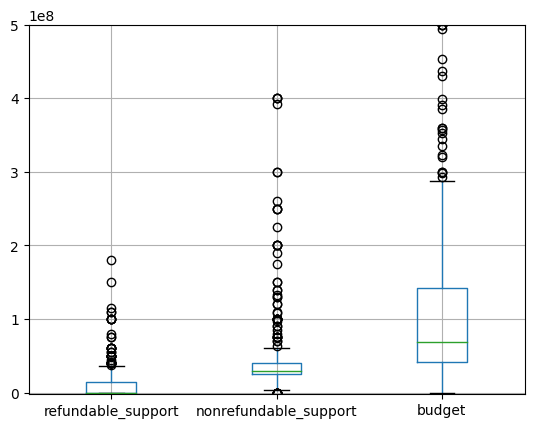

In [32]:
combined_data['refundable_support'].unique()
combined_data.boxplot(column=['refundable_support','nonrefundable_support','budget'])
plt.ylim(-2000000,500000000)

In [34]:
combined_data['refundable_support'].describe()

count    3.320000e+02
mean     1.186446e+07
std      2.491656e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.500000e+07
max      1.800000e+08
Name: refundable_support, dtype: float64

<Axes: title={'center': 'Объём возвратных средств'}, ylabel='Frequency'>

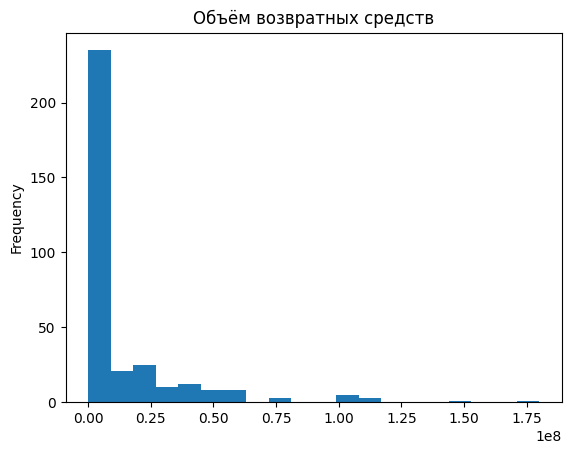

In [35]:
combined_data['refundable_support'].plot(kind = 'hist',bins = 20, title = 'Объём возвратных средств')

In [36]:
combined_data['nonrefundable_support'].describe()

count    3.320000e+02
mean     4.898099e+07
std      5.998012e+07
min      0.000000e+00
25%      2.500000e+07
50%      3.000000e+07
75%      4.037500e+07
max      4.000000e+08
Name: nonrefundable_support, dtype: float64

<Axes: title={'center': 'Объём невозвратных средств'}, ylabel='Frequency'>

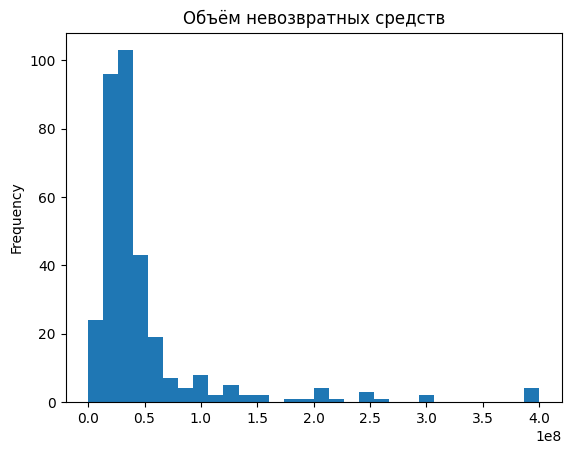

In [37]:
combined_data['nonrefundable_support'].plot(kind = 'hist',bins = 30, title = 'Объём невозвратных средств')

In [38]:
combined_data['budget'].describe()

count    3.320000e+02
mean     1.272297e+08
std      1.885883e+08
min      0.000000e+00
25%      4.200000e+07
50%      6.864992e+07
75%      1.419853e+08
max      2.305074e+09
Name: budget, dtype: float64

<Axes: title={'center': 'Общий бюджет фильма'}, ylabel='Frequency'>

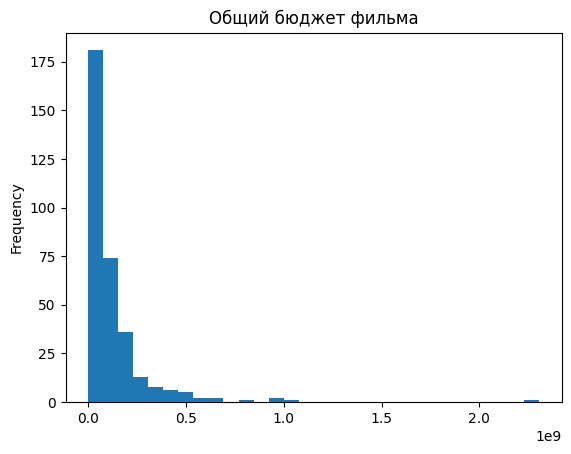

In [39]:
combined_data['budget'].plot(kind = 'hist', bins = 30, title = 'Общий бюджет фильма')

После построения даиграмм размаха, а так же проверки основных показателей по столбцам возвратных средств, невозвратных средств и общего буджета фильма видим что бюджет в несколько раз превышает сумму возватных и не возвратных средств. По все видимости на фильмы по которым у нас есть информация о бюджете так же ипользовались какие-то дополнительные средств, что в целом выглядит логично.

In [40]:
combined_data.loc[combined_data['budget']>0, 'budget']

1281     79411900.0
1448     37142857.0
1498    176023490.0
1524     40574140.0
1792     40015122.0
           ...     
7464    980000000.0
7466    190000000.0
7474    944000000.0
7476     46154000.0
7478    150147502.0
Name: budget, Length: 315, dtype: float64

In [41]:
combined_data.loc[combined_data['refundable_support']>0, 'refundable_support']

1870     50000000.0
1987     26000000.0
2005     30000000.0
2142     30000000.0
2288     15000000.0
           ...     
7456     25000000.0
7464    100000000.0
7466    100000000.0
7474    100000000.0
7478     40000000.0
Name: refundable_support, Length: 111, dtype: float64

In [42]:
combined_data.loc[combined_data['nonrefundable_support']>0, 'nonrefundable_support']

1281     26500000.0
1448     26000000.0
1498    107847945.0
1524     28000000.0
1792     25000000.0
           ...     
7456     35000000.0
7464    400000000.0
7474    400000000.0
7476     30000000.0
7478     60000000.0
Name: nonrefundable_support, Length: 323, dtype: float64

In [43]:
combined_data.loc[combined_data['budget']>0].head(20)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1281,Пока еще жива,111005313,2013-10-11 12:00:00+00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.0,26500000.0,79411900.0,Министерство культуры,8.1,"драма,мелодрама",365353.6
1448,Бесславные придурки,111003314,2014-03-28 12:00:00+00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.0,26000000.0,37142857.0,Министерство культуры,0.0,неизвестно,28140.0
1498,Невидимки,111004213,2013-09-10 12:00:00+00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.0,107847945.0,176023490.0,Фонд кино,5.3,"комедия,фантастика",19957031.5
1524,БЕРЦЫ,111004314,2014-05-05 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.0,28000000.0,40574140.0,Министерство культуры,4.2,драма,55917.5
1792,Братья Ч,111004414,2014-04-23 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.0,25000000.0,40015122.0,Министерство культуры,6.4,драма,232100.0
1854,Тайна Сухаревой башни. Чародей равновесия,114000115,2015-02-18 12:00:00+00:00,Анимационный,"ООО ""Студия ""Мастер-Фильм""",Россия,С.Серегин,А.Герасимов,«6+» - для детей старше 6 лет,0.0,25000000.0,51850000.0,Министерство культуры,6.1,"мультфильм,фэнтези,история",15078858.6
1870,А зори здесь тихие..._,111002915,2015-03-16 12:00:00+00:00,Художественный,"ООО ""Компания ""Реал-Дакота""",Россия,Р.Давлетьяров,неизвестно,«12+» - для детей старше 12 лет,50000000.0,100000000.0,220588394.0,Фонд кино,8.5,"драма,военный,история",249166767.7
1871,Две женщины,111013714,2014-10-02 12:00:00+00:00,Художественный,"ООО ""Продюсерский Центр ""Хорошо Продакшн"", Rez...",Россия-Франция-Латвия,В.Глаголева,Н.Иванова,«12+» - для детей старше 12 лет,0.0,46502299.0,86210067.0,"Министерство культуры, Фонд кино",6.7,драма,4731239.5
1903,Призрак_.,111001815,2015-03-02 12:00:00+00:00,Художественный,"ООО ""Водород 2011""",Россия,А.Войтинский,С.Сельянов,«6+» - для детей старше 6 лет,0.0,75000000.0,139551503.0,Фонд кино,7.0,"триллер,боевик,приключения",352804320.4
1912,Ведьма .,111002215,2015-03-05 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""Ракурс""",Россия,Д.Федоров,В.Сидоренко,«16+» - для детей старше 16 лет,0.0,34000000.0,48571430.0,Министерство культуры,7.4,"фэнтези,приключения,драма",51907.5


<Axes: title={'center': 'Cборы в рублях'}, ylabel='Frequency'>

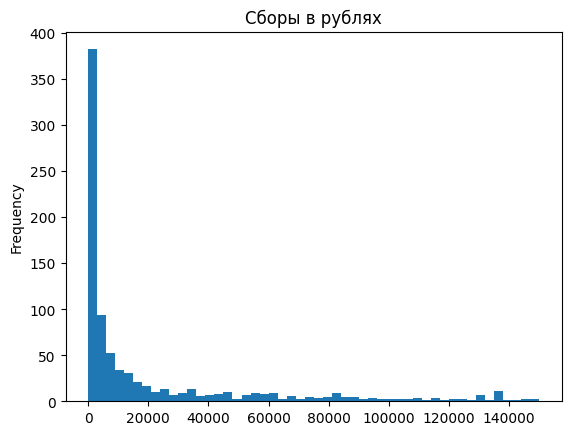

In [44]:
combined_data['box_office'].plot(kind = 'hist',bins=50, range=(0, 150000), title = 'Cборы в рублях')

Если посмотреть на сборы на диаграмме размаха, видим что для большинства фильмов сборы близки к нулю.

#### Шаг 2.6. Добавьте новые столбцы





- Создайте столбец с информацией о годе проката. Выделите год из даты премьеры фильма.

In [45]:
combined_data['rental_year'] = combined_data['show_start_date'].dt.year
combined_data.head(20)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,rental_year
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN,2015
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,неизвестно,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN,2016
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2016
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2016
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2015
5,Остановился поезд,111013816,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,неизвестно,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,драма,NaN,2016
6,Любовь и голуби,111007013,2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,неизвестно,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.3,"мелодрама,комедия",2700.0,2013
7,Любовь и сигареты,221074614,2014-12-29 12:00:00+00:00,Художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...",США,Джон Туртурро,"Джон Пенотти, Джон Туртурро",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.6,"мюзикл,мелодрама,комедия",NaN,2014
8,Отпетые мошенники.,121011416,2016-05-05 12:00:00+00:00,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",Франция,Эрик Беснард,Патрис Леду,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,8.0,"комедия,криминал",NaN,2016
9,Отпуск за свой счет,111019114,2014-12-01 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР",СССР-Венгрия,В.Титов,неизвестно,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.8,"мелодрама,комедия",NaN,2014


- Создайте два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.



In [46]:
combined_data['director_name'] = combined_data['director'].str.split(",").str.get(0)
combined_data['main_genre'] = combined_data['genres'].str.split(",").str.get(0)
combined_data.head(20)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,rental_year,director_name,main_genre
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN,2015,Кевин Костнер,боевик
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,неизвестно,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN,2016,Е.Матвеев,драма
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2016,Тимур Бекмамбетов,фантастика
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2016,Тимур Бекмамбетов,фантастика
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2015,Тимур Бекмамбетов,фантастика
5,Остановился поезд,111013816,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,неизвестно,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,драма,NaN,2016,В.Абдрашитов,драма
6,Любовь и голуби,111007013,2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,неизвестно,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.3,"мелодрама,комедия",2700.0,2013,В.Меньшов,мелодрама
7,Любовь и сигареты,221074614,2014-12-29 12:00:00+00:00,Художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...",США,Джон Туртурро,"Джон Пенотти, Джон Туртурро",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.6,"мюзикл,мелодрама,комедия",NaN,2014,Джон Туртурро,мюзикл
8,Отпетые мошенники.,121011416,2016-05-05 12:00:00+00:00,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",Франция,Эрик Беснард,Патрис Леду,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,8.0,"комедия,криминал",NaN,2016,Эрик Беснард,комедия
9,Отпуск за свой счет,111019114,2014-12-01 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР",СССР-Венгрия,В.Титов,неизвестно,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.8,"мелодрама,комедия",NaN,2014,В.Титов,мелодрама


Для получения новых столбцов использовал метод split.
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.split.html

- Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.

In [48]:
combined_data['state_support'] = ((combined_data['refundable_support'] + combined_data['nonrefundable_support'])/
                                  combined_data['budget']*100).round(2)
combined_data.loc[combined_data['state_support']>0]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,rental_year,director_name,main_genre,state_support
1281,Пока еще жива,111005313,2013-10-11 12:00:00+00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.0,26500000.0,79411900.0,Министерство культуры,8.1,"драма,мелодрама",3.653536e+05,2013,А.Атанесян,драма,33.37
1448,Бесславные придурки,111003314,2014-03-28 12:00:00+00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.0,26000000.0,37142857.0,Министерство культуры,0.0,неизвестно,2.814000e+04,2014,А.Якимчук,неизвестно,70.00
1498,Невидимки,111004213,2013-09-10 12:00:00+00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.0,107847945.0,176023490.0,Фонд кино,5.3,"комедия,фантастика",1.995703e+07,2013,Р.Давлетьяров,комедия,61.27
1524,БЕРЦЫ,111004314,2014-05-05 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.0,28000000.0,40574140.0,Министерство культуры,4.2,драма,5.591750e+04,2014,Е.Миндадзе (псевдоним Катя Шагалова),драма,69.01
1792,Братья Ч,111004414,2014-04-23 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.0,25000000.0,40015122.0,Министерство культуры,6.4,драма,2.321000e+05,2014,М.Угаров,драма,62.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7464,Союз спасения,111022019,2019-12-26 12:00:00+00:00,Художественный,"ЗАО ""Дирекция кино""",Россия,А.Кравчук,"А.Максимов, К.Эрнст",«12+» - для детей старше 12 лет,100000000.0,400000000.0,980000000.0,Фонд кино,6.0,"история,биография,драма",7.177032e+08,2019,А.Кравчук,история,51.02
7466,Иван Царевич и Серый Волк 4,114005019,2019-12-20 12:00:00+00:00,Анимационный,"ООО ""Студия анимационного кино ""Мельница""",Россия,"Д.Шмидт, К.Феоктистов","С.Сельянов, А.Боярский",«6+» - для детей старше 6 лет,100000000.0,0.0,190000000.0,Фонд кино,6.7,"мультфильм,приключения,семейный",5.010692e+08,2019,Д.Шмидт,мультфильм,52.63
7474,Вторжение,111022519,2019-12-23 12:00:00+00:00,Художественный,"ООО ""Арт Пикчерс Студия"", ООО ""Водород 2011""",Россия,Ф.Бондарчук,"Ф.Бондарчук, М.Врубель, А.Андрющенко, Д.Рудовский",«12+» - для детей старше 12 лет,100000000.0,400000000.0,944000000.0,Фонд кино,5.7,"фантастика,боевик",NaN,2019,Ф.Бондарчук,фантастика,52.97
7476,Я свободен,111023019,2019-12-26 12:00:00+00:00,Художественный,"АО ""ТПО ""Киностудия им. М.Горького""",Россия,И.Северов,С.Зернов,«12+» - для детей старше 12 лет,0.0,30000000.0,46154000.0,Министерство культуры,5.9,драма,NaN,2019,И.Северов,драма,65.00


### Шаг 3. Проведите исследовательский анализ данных


- Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

In [49]:
combined_data = combined_data.rename(columns = {'puNumber':'pu_number'})

<Axes: title={'center': 'Количество фильмов в год'}, xlabel='Год', ylabel='Количество фильмов'>

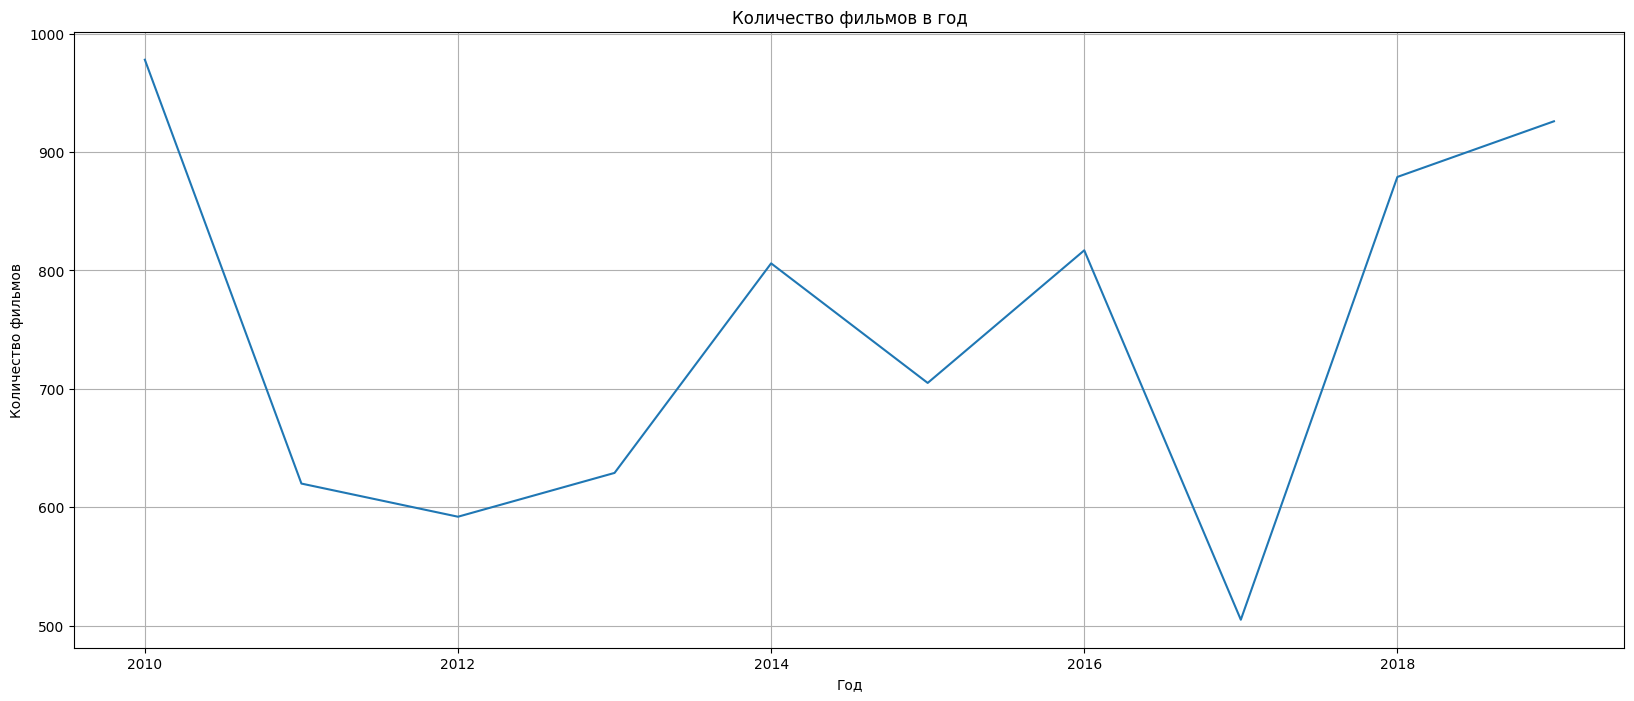

In [50]:
combined_data.groupby('rental_year')['show_start_date'].count() \
.plot(title = 'Количество фильмов в год', figsize = (20, 8), grid = True, ylabel = 'Количество фильмов', xlabel = 'Год')

In [51]:
film_inyear = combined_data.groupby('rental_year')['show_start_date'].count()
rent_film_inyear_perc = round((combined_data.groupby('rental_year')['box_office'].count()/
                               combined_data.groupby('rental_year')['show_start_date'].count())*100,2)
display(pd.DataFrame({'Количество фильмов':film_inyear,'% фильмов в прокате':rent_film_inyear_perc})
                    .style.format('{:.2f}').background_gradient('coolwarm'))

,Количество фильмов,% фильмов в прокате
rental_year,,
2010,978.00,10.74
2011,620.00,17.58
2012,592.00,21.45
2013,629.00,29.25
2014,806.00,34.62
2015,705.00,65.96
2016,817.00,64.26
2017,505.00,70.69
2018,879.00,53.92


Для того чтобы посчитать количество фильмов по годам используем метод группировки плюс метод count(). А вот для получения процента фильмов в прокате проведем те же дейтсвия только посчитаем количество фильмов по которым были прокатные сборы, а затем разделим полученное количество на количество вышедших фильмов в год.
В результат видим что начиная с 2015 года количество филмов в прокате не опускалось менее 54% от выпущенных фильмов за этот год. При этом наибольший процент фильмов в прокате был в 2017 целых 70.69%, а наименьший в 2010 - 10.71%

In [52]:
round((combined_data['box_office'].count()/combined_data['show_start_date'].count())*100,2)

42.31

- Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

In [53]:
box_office_sum = combined_data.groupby('rental_year')['box_office'].sum()
display(pd.DataFrame({'Сумма зборов':box_office_sum}).style.format('{:.0f}').background_gradient('coolwarm'))

,Сумма зборов
rental_year,
2010,2428654
2011,14102765
2012,6911073
2013,29799706
2014,7444951859
2015,39497365196
2016,47866105215
2017,48563707218
2018,49668361909


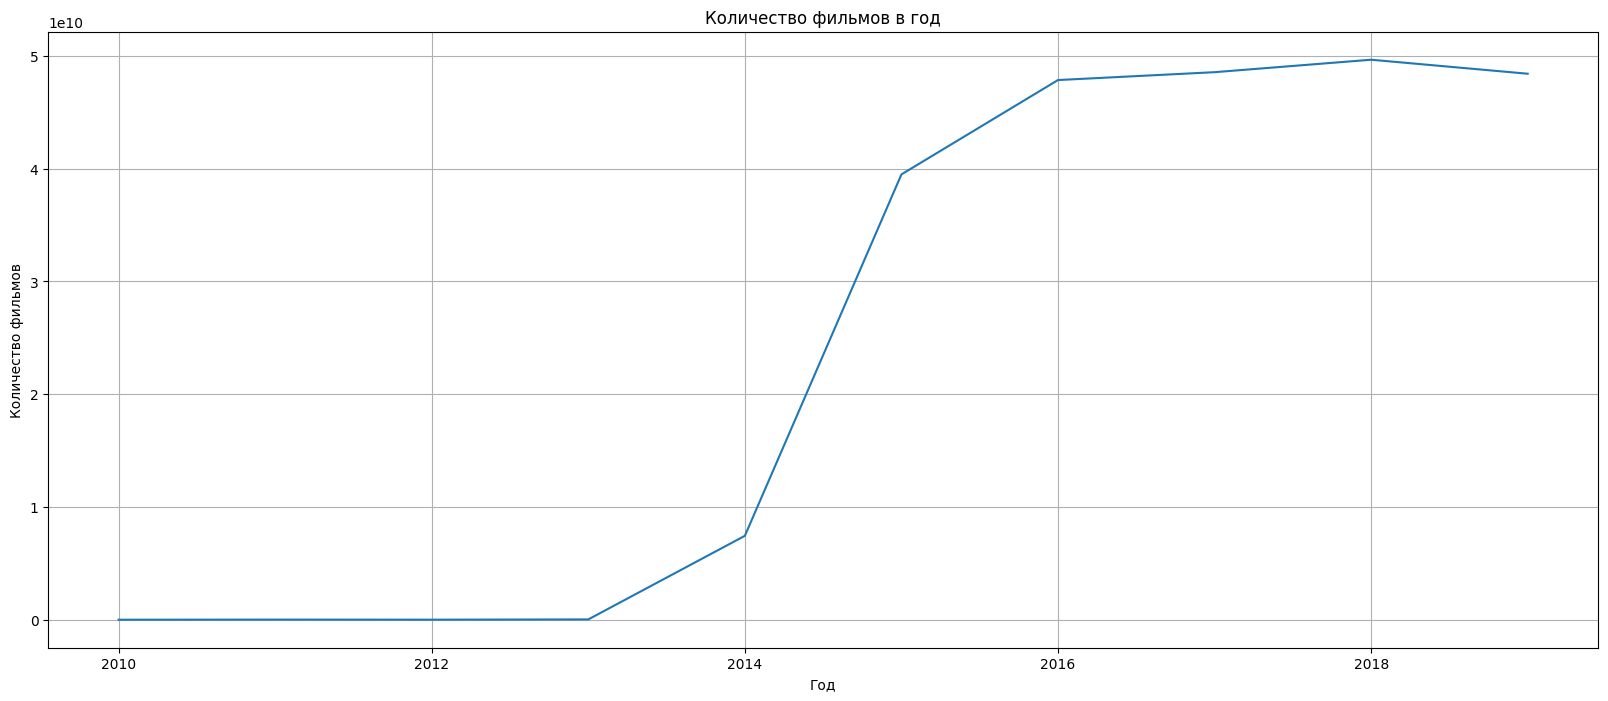

In [54]:
box_office_sum = combined_data.groupby('rental_year')['box_office'].sum() \
.plot(title = 'Количество фильмов в год', figsize = (20, 8), grid = True, ylabel = 'Количество фильмов', xlabel = 'Год')

Аналогичным образом через грeппировку данных и сумму по полю сборов получаем таблицу с данными. Согласно которой минимальная сумма собров была в 2010 году, а максимальная в 2018.

- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

In [55]:
mean_median = combined_data.pivot_table(index = 'rental_year', values = 'box_office', aggfunc = ['mean', 'median']).round()
mean_median.columns = ['mean', 'median']
display(pd.DataFrame(mean_median).style.format('{:.0f}').background_gradient('coolwarm'))

,mean,median
rental_year,,
2010,23130,1700
2011,129383,3000
2012,54418,5560
2013,161955,3522
2014,26684415,18160
2015,84940570,4920933
2016,91173534,3915041
2017,136032793,9968340
2018,104785574,8911534


<div class="alert alert-info">
<b>Медиана у нас в несколько раз меньше среднего значения, что говорит о наличие больших значений в показетеле, которые в итоге и влияют на среднее.</b>
</div>


- Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

In [56]:
from_15_to_19 = combined_data.loc[combined_data['rental_year'] > 2014]
age_rest_box = from_15_to_19.groupby('age_restriction')['box_office'].sum()
display(pd.DataFrame({'Сумма зборов':age_rest_box}).style.format('{:.0f}').background_gradient('coolwarm'))

,Сумма зборов
age_restriction,
«0+» - для любой зрительской аудитории,808882899
«12+» - для детей старше 12 лет,60619405403
«16+» - для детей старше 16 лет,76034733644
«18+» - запрещено для детей,40759615572
«6+» - для детей старше 6 лет,55798610800


<Axes: title={'center': 'Сумма сбров возрастным ограничениям'}, xlabel='age_restriction'>

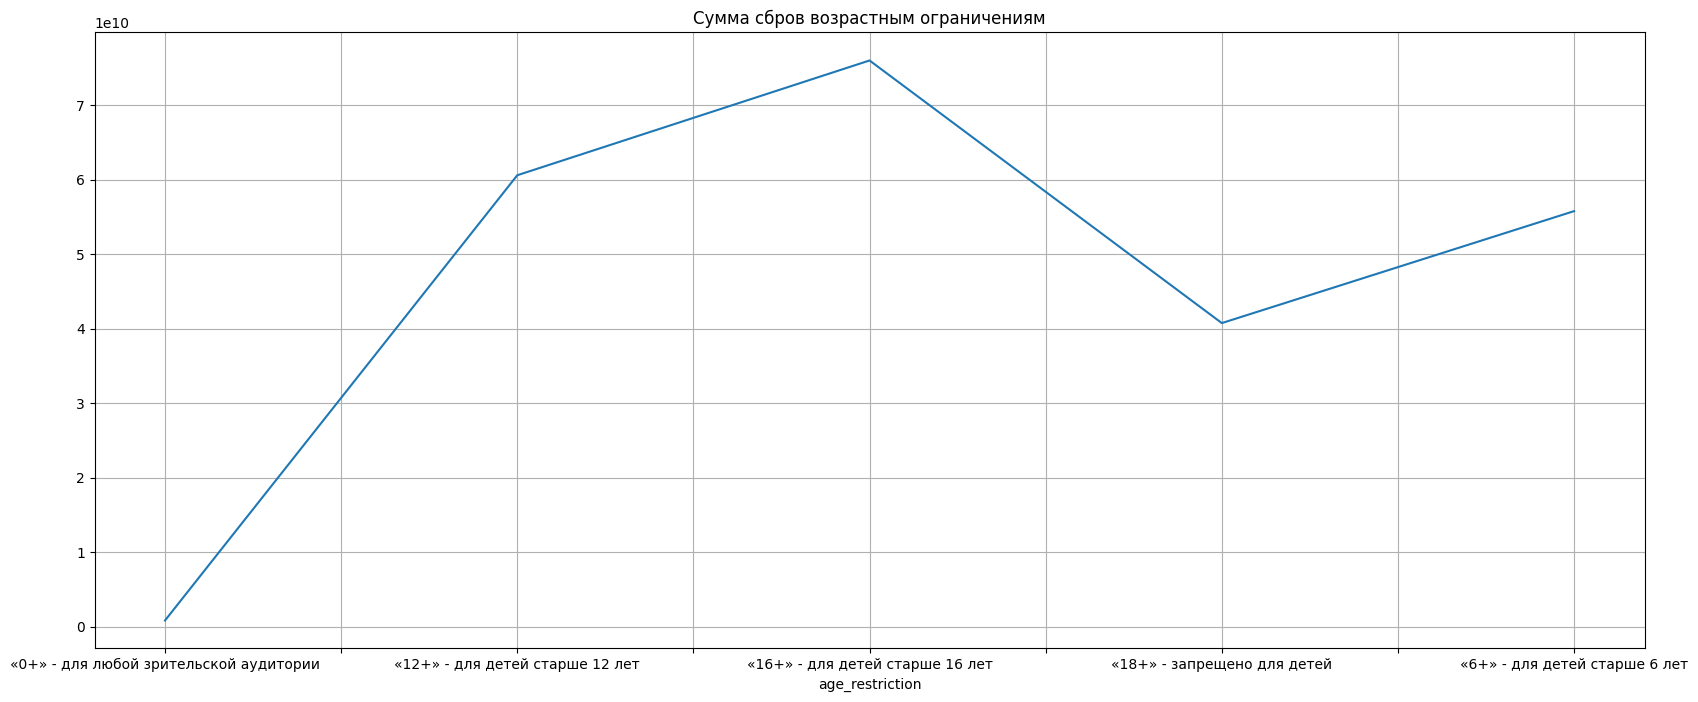

In [57]:
age_rest_box.plot(title = 'Сумма сбров возрастным ограничениям', figsize = (20, 8), grid = True)

Что касается зависимости суммы сбров от возрастной категории четкой зависимости не наблюдается. Имеется постепенный рост суммы сбров с категории 0+ до 16+, но в категории 18+ идет снижение суммы. Больше всего за период с 2015 по 2019 годы собрали фильмы в категории 16+. Меньще всего за тот же временной период в категории 0+.

In [58]:
sum_per_year = from_15_to_19.pivot_table(
    index = 'age_restriction',
    columns = 'rental_year',
    values = 'box_office',
    aggfunc = ['count','sum']).round()
display(pd.DataFrame(sum_per_year).style.format('{:.0f}').background_gradient('coolwarm'))


Если посмотреть по годам видим что картина практически не меняется. Наименьшая сумма сбров у категории 0+, а наибольшая 16+. Хотя в 2015 наибольшая сумма была в категории 12+. А уже в 2019 можно сказать что максимальная сумма сборов примерно равна для трех категорий 12+, 16+ и 6+.
Если еще посмотреть на количество фильмов что выпускалось в каждой категории, то можно отметить, что в 2019 годы почти во всех категориях было выпущено наибольшее количество фильмов за весь период с 2015 по 2019 годы, что способствовало росту сборов. Исключение фильмы 0+ в этой категории фильмов было выпущено наименьшее коичество, всего 3. Что в целом логично, так как данная категория не приносит больших сборов.

In [59]:
sum_per_year = from_15_to_19.pivot_table(
    index = 'age_restriction',
    columns = 'rental_year',
    values = 'box_office',
    aggfunc = 'median').round()
display(pd.DataFrame(sum_per_year).style.format('{:.0f}').background_gradient('coolwarm'))

rental_year,2015,2016,2017,2018,2019
age_restriction,,,,,
«0+» - для любой зрительской аудитории,2943319,2687779,22178956,3616937,3885434
«12+» - для детей старше 12 лет,15351562,4690635,9010548,10035323,3405546
«16+» - для детей старше 16 лет,4676819,5133022,9702077,9010639,3210718
«18+» - запрещено для детей,4616615,6107002,8212677,7179466,5603217
«6+» - для детей старше 6 лет,20380982,3026256,51992103,14688850,12875350


<div class="alert alert-info">
<b>Если посмотреть на медиану по сборам в каждой категории, то видим что наибольшая сумма сборов по медиане была в категории 6+ все года с 2015 по 2019 за исключением 2016 года. А наименьшая менялась практически ежегодно. Если рассмотреть 2019 год то наибольшая медиана была у категории 6+, а нименьшая у 16+.</b>
</div>

### Шаг 4. Исследуйте фильмы, которые получили государственную поддержку

На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

In [60]:
support_ref_nonref = combined_data.pivot_table(
    index = 'rental_year',
    values = ['nonrefundable_support', 'refundable_support'],
    aggfunc = 'sum').round()
display(pd.DataFrame(support_ref_nonref).style.format('{:.0f}').background_gradient('coolwarm'))

,nonrefundable_support,refundable_support
rental_year,,
2010,0,0
2011,0,0
2012,0,0
2013,134347945,0
2014,501002299,71000000
2015,3019088340,637153119
2016,3381655482,921500000
2017,2464624781,719346881
2018,2784969465,662000000


После группировки по годам возвратных и не возвратных срадств поддержки видим что до 2013 года средства не выделялись совсем, а в 2014 и 2015 годах выделенные средства были минимальныеми. Целесообразнее рассматривать период с 2015 по 2019 годы. Еще один момент по данной таблице видно что суммы средств на возвратной основе в разы меньше. Наибольшие суммы поддержки были выделены в 2019 году.

In [61]:
type_support_ref_nonref = combined_data.pivot_table(
    index = 'type',
    values = ['nonrefundable_support', 'refundable_support'],
    aggfunc = 'sum').round()
display(pd.DataFrame(type_support_ref_nonref).style.format('{:.0f}').background_gradient('coolwarm'))

,nonrefundable_support,refundable_support
type,,
Анимационный,1640489465,930000000
Документальный,3000000,0
Музыкально-развлекательный,0,0
Научно-популярный,0,0
Прочие,0,0
Художественный,14618198847,3009000000


А вот если посмотреть по типу фильмов, то поддержка выделяется исключительно на Художественные, Анимационные и Документальные фильмы.

In [62]:
age_rest_ref_nonref = combined_data.pivot_table(
    index = 'age_restriction',
    values = ['nonrefundable_support', 'refundable_support'],
    aggfunc = 'sum').round()
display(pd.DataFrame(age_rest_ref_nonref).style.format('{:.0f}').background_gradient('coolwarm'))

,nonrefundable_support,refundable_support
age_restriction,,
«0+» - для любой зрительской аудитории,228520000,45000000
«12+» - для детей старше 12 лет,6231894165,1567500000
«16+» - для детей старше 16 лет,4733900200,835153119
«18+» - запрещено для детей,980000000,32346881
«6+» - для детей старше 6 лет,4087373947,1459000000


Что касается возрастной категории, то наибольшие средства выделяются для категории 16+(как возвратные так и не возвратные). А вот минимально возвратных средств выделяется для категории 18+, не возвратных - 0+.

In [63]:
country_ref_nonref = combined_data.pivot_table(
    index = 'production_country',
    values = ['nonrefundable_support', 'refundable_support'],
    aggfunc = 'sum').round()
for_table_nonre = country_ref_nonref.loc[ country_ref_nonref['nonrefundable_support']>0 ]
display(pd.DataFrame(for_table_nonre).style.format('{:.0f}').background_gradient('coolwarm'))

,nonrefundable_support,refundable_support
production_country,,
Россия,15631676013,3744000000
Россия-Армения,50000000,0
Россия-Бельгия-Финляндия,30000000,0
Россия-Германия,63000000,0
Россия-Германия-Великобритания,35000000,15000000
Россия-Германия-Казахстан-Польша-Китай,28000000,0
Россия-Грузия,25000000,0
Россия-Италия,120000000,0
Россия-Китай,90000000,180000000


In [64]:
fin_source_ref_nonref = combined_data.pivot_table(
    index = 'financing_source',
    values = ['nonrefundable_support', 'refundable_support'],
    aggfunc = 'sum').round()
display(pd.DataFrame(fin_source_ref_nonref).style.format('{:.0f}').background_gradient('coolwarm'))

,nonrefundable_support,refundable_support
financing_source,,
Министерство культуры,4836661000,0
"Министерство культуры, Фонд кино",859931354,325500000
Фонд кино,10565095958,3613500000


Наибольшее количество средств выделяет Фонд кино.

In [65]:
combined_data['budg_box_off'] = combined_data['budget'] - combined_data['box_office']
budg_box_off_ref_nonref = combined_data.pivot_table(
    index = 'rental_year',
    values = ['budg_box_off', 'nonrefundable_support', 'refundable_support'],
    aggfunc = 'sum').round()
display(pd.DataFrame(budg_box_off_ref_nonref).style.format('{:.0f}').background_gradient('coolwarm'))

,budg_box_off,nonrefundable_support,refundable_support
rental_year,,,
2010,0,0,0
2011,0,0,0
2012,0,0,0
2013,235113005,134347945,0
2014,262062616,501002299,71000000
2015,1482384805,3019088340,637153119
2016,1128528829,3381655482,921500000
2017,-3998502733,2464624781,719346881
2018,-3282374376,2784969465,662000000


Если вычесть из бюджета фильмов сумму сбров мы узнаем окупился фильм или нет. В результате видим что по общей сумме за год с 2015 по 2019 есть только два года(2017 и 2018) когда сборы в окупили затраченные средства. А вот в 2019 когда было выделено максимальное количество средств сборы не покрыли все расходы.

Давайте проверим как дела обстоят в отдельных категориях.

In [66]:
budg_box_off_age_rest = combined_data.pivot_table(
    index = 'age_restriction',
    values = ['budg_box_off', 'nonrefundable_support', 'refundable_support'],
    aggfunc = 'sum').round()
display(pd.DataFrame(budg_box_off_age_rest).style.format('{:.0f}').background_gradient('coolwarm'))

,budg_box_off,nonrefundable_support,refundable_support
age_restriction,,,
«0+» - для любой зрительской аудитории,253745752,228520000,45000000
«12+» - для детей старше 12 лет,-5996259373,6231894165,1567500000
«16+» - для детей старше 16 лет,3587579224,4733900200,835153119
«18+» - запрещено для детей,1690678425,980000000,32346881
«6+» - для детей старше 6 лет,-1063085445,4087373947,1459000000


In [67]:
budg_box_off_age_rest_year = combined_data.pivot_table(
    index = 'age_restriction',
    columns = 'rental_year',
    values = 'budg_box_off',
    aggfunc = 'sum').round()
display(pd.DataFrame(budg_box_off_age_rest_year).style.format('{:.0f}').background_gradient('coolwarm'))

rental_year,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
age_restriction,,,,,,,,,,
«0+» - для любой зрительской аудитории,0,0,0,0,-3125086,49219456,69224179,138427203,0,0
«12+» - для детей старше 12 лет,0,0,0,156066458,-101375802,250552621,-117238594,-1296496887,-2760474396,-2127292773
«16+» - для детей старше 16 лет,0,0,0,79046546,178947326,770227138,981872559,607636217,-885256568,1855106006
«18+» - запрещено для детей,0,0,0,0,228841812,212618439,185882848,83280047,589378128,390677151
«6+» - для детей старше 6 лет,nan,0,0,0,-41225634,199767151,8787836,-3531349313,-226021540,2526956054


Если рассмотреть окупаемость по категориям в разрезе годов, то видим что больше всего средств выделялось на категорию 12+, при этом почти все года категория была прибыльной(сумма сборов привышала сумму бюджета фильма). При этом наиболее убыточной в период с 2015 по 2017 является категория 16+. В 2018 категория принесла доход, а в 2019 снова убыток. А вот в 2019 году наибольший убыток принесла категория 6+.


In [68]:
combined_data['budg_box_off'].sum().round()

-1527341417.0

В случае если взять сумму по столцу, в котором мы посчитали прибыль или убыток несет фильм, имеем прибыльный результат в целом.

In [69]:
def profit_or_loss(prof):
    if prof < 0:
        return 'прибыль'
    return 'убыток'
combined_data['profit_or_loss'] = combined_data['budg_box_off'].apply(profit_or_loss)
combined_data.groupby('profit_or_loss')['budg_box_off'].count()

profit_or_loss
прибыль     83
убыток     235
Name: budg_box_off, dtype: int64

Чтобы удобнее было анализировать рейтирг фильмов с государтсвенной поддержкой, проведем сотртировку и собрем новую табличку.

In [70]:
for_analisys_rate = combined_data.loc[combined_data['budget'] >= 0]
for_analisys_rate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 332 entries, 1281 to 7478
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  332 non-null    object             
 1   pu_number              332 non-null    int64              
 2   show_start_date        332 non-null    datetime64[ns, UTC]
 3   type                   332 non-null    object             
 4   film_studio            332 non-null    object             
 5   production_country     332 non-null    object             
 6   director               332 non-null    object             
 7   producer               332 non-null    object             
 8   age_restriction        332 non-null    object             
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64        

In [71]:
for_analisys_rate['ratings'].describe()

count    332.000000
mean       5.730723
std        1.710008
min        0.000000
25%        5.200000
50%        6.100000
75%        6.700000
max        9.400000
Name: ratings, dtype: float64

In [72]:
mean_median_rate = for_analisys_rate.pivot_table(
    index = 'age_restriction',
    values = 'ratings',
    aggfunc = ['count','mean','median'])
mean_median_rate.columns = ['count','mean', 'median']
display(pd.DataFrame(mean_median_rate).style.format('{:.1f}').background_gradient('coolwarm'))

,count,mean,median
age_restriction,,,
«0+» - для любой зрительской аудитории,8.0,5.6,6.6
«12+» - для детей старше 12 лет,106.0,5.6,6.1
«16+» - для детей старше 16 лет,125.0,5.8,6.0
«18+» - запрещено для детей,28.0,5.8,6.3
«6+» - для детей старше 6 лет,65.0,5.8,6.1


Если сгруппировать данные по возрастной категории и посмотреть среднее значение и медиану видим что значение средней оценки не поднимается выше 5.8. А медианы 6.6.

In [73]:
mean_median_rate = for_analisys_rate.pivot_table(
    index = 'age_restriction',
    columns = 'rental_year',
    values = 'ratings',
    aggfunc = 'mean')
display(pd.DataFrame(mean_median_rate).style.format('{:.1f}').background_gradient('coolwarm'))

rental_year,2013,2014,2015,2016,2017,2018,2019
age_restriction,,,,,,,
«0+» - для любой зрительской аудитории,nan,5.2,6.7,3.5,6.5,nan,8.0
«12+» - для детей старше 12 лет,5.3,5.0,6.4,5.2,5.8,5.3,5.6
«16+» - для детей старше 16 лет,8.1,6.1,5.8,5.7,5.5,5.9,5.7
«18+» - запрещено для детей,nan,6.6,4.9,5.7,5.0,6.6,5.8
«6+» - для детей старше 6 лет,nan,5.0,5.9,5.0,6.0,5.0,6.6


После группировки рейтинга фильмов на три группы(низкая, средняя и высокая) видим по сути тот же результат, что наибольшее количество фильмов получает оценку от 4 до 7.5

In [74]:
dir_name_ref_nonref = combined_data.pivot_table(
    index = 'director_name',
    values = ['nonrefundable_support', 'refundable_support'],
    aggfunc = 'sum').round().sort_values(by = 'nonrefundable_support', ascending = False)
for_table_nonre = dir_name_ref_nonref.loc[dir_name_ref_nonref['nonrefundable_support']>0 ]
display(pd.DataFrame(for_table_nonre).style.format('{:.0f}').background_gradient('coolwarm'))

,nonrefundable_support,refundable_support
director_name,,
Ф.Бондарчук,650000000,100000000
Н.Хомерики,540000000,120000000
А.Кравчук,400000000,100000000
А.Мегердичев,400000000,0
Р.Давлетьяров,394847945,65000000
Н.Лебедев,392104482,50000000
А.Мизгирев,300000000,150000000
К.Шипенко,287000000,25000000
В.Тодоровский,270000000,10000000


Если посмотреть на список режисеров кто получал наибольшую поддержку в невозвратных стредствах то на превом месте находится Ф.Бондарчук. На втором и третьем соотвественно Н.Хомерики и А.Кравчук.
А вот по возвратным средствам на первом месте О.Степченко.

### Шаг 5. Напишите общий вывод

В ходе работы над проектом были проделаны следующие действия:

1) Обзор и знакомство с данными - Вывели информация по двум таблицам, чтобы понимать с какими данными имеем дело. После чего скорректировкли тип данных по столбцу puNumber. А затем по нему объединили таблицы.

2) Предобработка данных - Проверили данные на наличие пропусков. А так же явных и не явных дубликатов. Затем проверили данные на их корректность типов данных в столбцах. В данных с ошибками провели корректировку. Так же добавили в таблицу необходимые столбцы для дальнейшего расчета.

3) Исследовательский анализ:

- Посмотрели сколько фильмов выходило в год;
- Проверили динамику сборов по годам;
- Нашли занчения среднего и медианы сбров для каждого года;
- Посмотрели влияют ли возрастные ограничения на сборы и зависимость от года выпуска фильма.

4) Провели анализ какие средства выделяются на поддержку кино. Посмотрели динамику по сборам фильмов, окупаются они или нет. А так же проверили какие оценки получают фильмы с поддержкой.

Вывод: На основании проведенного анализа можно сделать следующие выводы. В период с 2015 по 2019 годы в прокат выходило от 500 до чуть более 900 фильмов. При этом в прокате было от 54% в 2015 году до целых 70.69% в 2017. Общая доля фильмов с информацией о прокате составила 42.3%. Что касается суммы сборов то минимальная была в 2010, а максимальна в 2018 году. Четкой зависимости суммы сбров от возрастной категории не наблюдается. Имеется постепенный рост суммы сбров с категории 0+ до 16+, но в категории 18+ идет снижение суммы. Больше всего за период с 2015 по 2019 годы собрали фильмы в категории 16+. Меньше всего за тот же временной период в категории 0+. Если посмотреть по годам видим, что картина практически не меняется. При этом если проверить количество фильмов в год приходим к выводу, что росту сборов способствует рост числа выпускаемых фильмов.

Что касается сумм выделяемых для поддержки то до 2013 года средства не выделялись совсем, а в 2014 и 2015 годах выделенные средства были минимальныеми. Наибольшие суммы поддержки были выделены в 2019 году. Возвратные средства 928 млн, а не возвратные почти 4 млрд. А вот если посмотреть по типу фильмов, то поддержка выделяется исключительно на Художественные, Анимационные и Документальные фильмы. Что касается возрастной категории, то наибольшие средства выделяются для категории 16+(как возвратные так и не возвратные). А вот минимально возвратных средств выделяется для категории 18+, не возвратных - 0+. Главным источником поддержки является Фонд кино.

Если рассмотреть окупаемость по категориям в разрезе годов, то видим что больше всего средств выделялось на категорию 12+, при этом почти все года категория была прибыльной(сумма сборов привышала сумму бюджета фильма). А наиболее убыточной в период с 2015 по 2017 является категория 16+. В 2018 категория принесла доход, а в 2019 снова убыток. Что касается 2019 года то наибольший убыток принесла категория 6+. При этом если посмотреть на рейтинги данных фильмов что получали поддержку, то среднее значени оценки не превышает 5,8. Это показывает что данные фильмы не особо пользуются популярностью.

Если посмотреть на список режисеров кто получал наибольшую поддержку в невозвратных стредствах, то на превом месте находится Ф.Бондарчук. На втором и третьем соотвественно Н.Хомерики и А.Кравчук. А вот по возвратным средствам на первом месте О.Степченко.